In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
%matplotlib inline

Using TensorFlow backend.
/home/kopita/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# 1. Cargar modelo

In [2]:
model = ResNet50()

In [3]:
# Vemos el tamaño del input
model.input

<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>

# 2. Cargar ejemplo

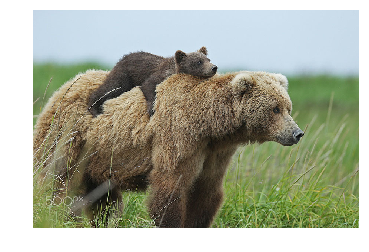

In [4]:
path = 'imgs/bear.jpg'
img = Image.open(path)
img.size
plt.imshow(img)
plt.axis('off');

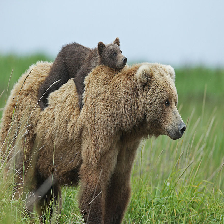

In [5]:
# Ajustamos la imagen al tamaño de model.input
img_resized = img.resize((224, 224))
img_resized

# 3. Usar el modelo

In [6]:
# Llevamos la imagen a un array de tipo float32
x = np.asarray(img_resized, np.float32)
x.shape

(224, 224, 3)

In [7]:
# Ajustamos las dimensiones
x = x[None]
x.shape

(1, 224, 224, 3)

In [8]:
# Utilizamos el preprocesing del modelo
x = preprocess_input(x)

In [9]:
# Obtenemos los resultados del modelo (un array con los puntajes de 1000 clases)
y = model.predict(x)
y.shape, y[0,:10]

((1, 1000), array([  3.52631946e-09,   1.03423459e-09,   7.72654118e-09,
          1.23314148e-09,   1.84443649e-09,   6.62237509e-09,
          1.52447310e-09,   1.71605645e-08,   7.79605802e-09,
          1.57774011e-07], dtype=float32))

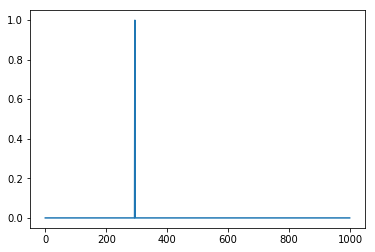

In [10]:
# Visualizamos las predicciones
plt.plot(y[0]);

In [11]:
# Usamos la funcion decode_predictions para obtener el nombre de las 5 clases mas probables
preds = decode_predictions(y)
preds

[[('n02132136', 'brown_bear', 0.99837589),
  ('n02133161', 'American_black_bear', 0.00036340495),
  ('n02410509', 'bison', 0.00032772904),
  ('n02486410', 'baboon', 0.00013254299),
  ('n02134084', 'ice_bear', 0.00012861486)]]

# 4. Resumiendo en una funcion

In [12]:
def get_class(path):
    img = Image.open(path)
    img_resized = img.resize((224, 224))
    x = np.asarray(img_resized, np.float32)
    x = x[None]
    x = preprocess_input(x)
    y = model.predict(x)
    preds = decode_predictions(y)
    plt.imshow(img)
    plt.axis('off')
    return preds

[[('n02129604', 'tiger', 0.8177582),
  ('n02123159', 'tiger_cat', 0.18131056),
  ('n02391049', 'zebra', 0.00041709104),
  ('n02128925', 'jaguar', 0.00012149228),
  ('n02128385', 'leopard', 8.0233367e-05)]]

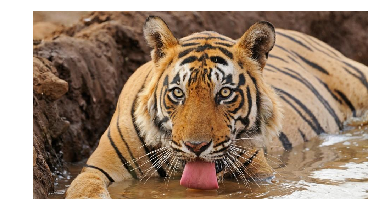

In [13]:
get_class('imgs/tiger.jpg')

[[('n02107908', 'Appenzeller', 0.91411805),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.033683587),
  ('n02110806', 'basenji', 0.020312009),
  ('n02108000', 'EntleBucher', 0.011757696),
  ('n02107683', 'Bernese_mountain_dog', 0.0064151203)]]

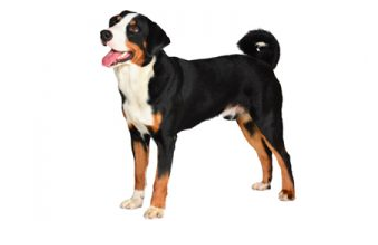

In [14]:
get_class('imgs/dog1.jpg')

[[('n02088364', 'beagle', 0.77007961),
  ('n02089867', 'Walker_hound', 0.16659191),
  ('n02088238', 'basset', 0.032554757),
  ('n02089973', 'English_foxhound', 0.027691538),
  ('n02088632', 'bluetick', 0.0017164814)]]

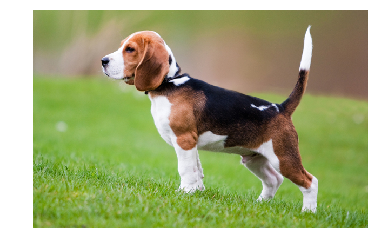

In [15]:
get_class('imgs/dog2.jpg')

[[('n04536866', 'violin', 0.60980678),
  ('n02992211', 'cello', 0.35251939),
  ('n03272010', 'electric_guitar', 0.0045177569),
  ('n03527444', 'holster', 0.0036125546),
  ('n02676566', 'acoustic_guitar', 0.0035001563)]]

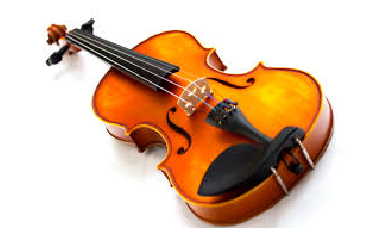

In [16]:
get_class('imgs/violin.jpeg')